In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def get_spectrum(n, theta, outliers):
    G = np.random.normal(size=(n, n))
    X = (G + np.transpose(G)) / (2*n)**0.5
    u = np.random.rand(n)
    u = u / np.linalg.norm(u)
    u = u[None, :]
    X_tilda = X + theta * u * u.transpose()
    X_bar = X_tilda + outliers
    eigvals, eigvecs = np.linalg.eig(X_bar)
    idx = np.argmax(eigvals)
    max_eigvec = eigvecs[:, idx]
    inner_prod = np.inner(max_eigvec, u.reshape(-1))
    return sorted(eigvals), inner_prod


def outlier_generator(n, d, p):
    return np.random.choice([-1*d, d, 0], size=(n, n), p=[p/2, p/2, 1-p])
    

100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


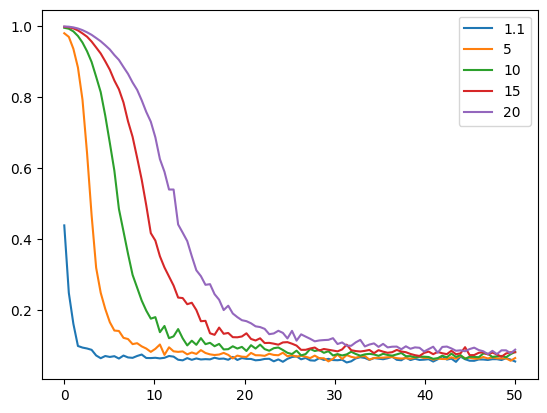

In [2]:
trials = 100
n = 200
theta_list = [1.1, 5, 10, 15, 20]
p = 0.01
d_list = np.linspace(0, 50, 100)
for theta in theta_list:
    inner_prods = [0] * len(d_list)
    for i in tqdm(range(trials)):
        for idx, d in enumerate(d_list):
            outliers = outlier_generator(n, d, p)
            eig_vals, inner_prod = get_spectrum(n, theta, outliers)
            inner_prods[idx] += np.abs(inner_prod) / trials
    plt.plot(d_list, inner_prods, label=f'{theta}')
plt.legend()
plt.show()